In [1]:
import pandas as pd 
import numpy as np

In [2]:
data_train=pd.read_csv("F:\\machine learning\\nlp-getting-started\\train.csv")

In [3]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data_train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
data_train["target"].count()

7613

In [6]:
data_train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
text=" "
for i in data_train['text']:
    text=text+i

In [8]:
text

" Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay 

In [9]:
import re

In [10]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
clean_text = text.lower()
clean_text = re.sub(r'\W',' ',clean_text)
clean_text = re.sub(r'\d',' ',clean_text)
clean_text = re.sub(r'\s+',' ',clean_text)

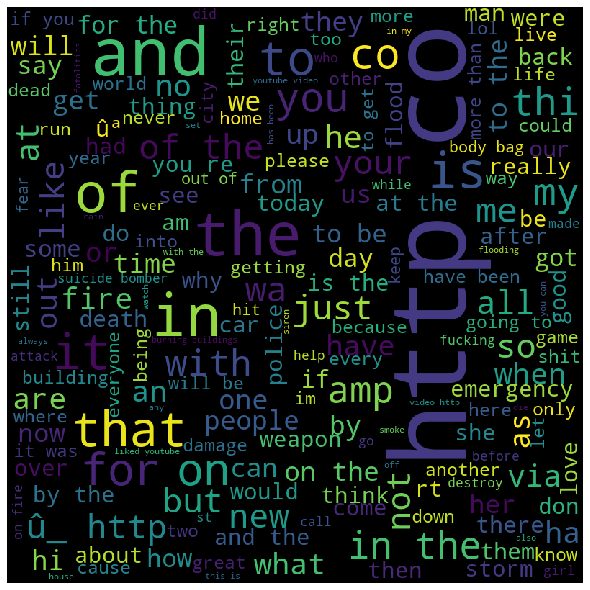

In [11]:
#importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords1=['x80','https']
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', stopwords=stopwords1,
                min_font_size = 10).generate(clean_text) 
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [12]:
data_train["text"] = data_train["text"].apply(lambda x: x.lower())

In [13]:
x=data_train['text']
y=data_train['target']


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=121)

In [15]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6090,), (6090,), (1523,), (1523,))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(X_train)
X_train_transformed=tf.transform(X_train)
X_test_transformed=tf.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_transformed,y_train)
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(rf.predict(X_test_transformed),y_test.values))

0.7905449770190414


In [18]:
data_test=pd.read_csv("F:\\machine learning\\nlp-getting-started\\test.csv")

In [19]:
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [20]:
data_test=data_test[["text"]]

In [21]:
data_test.shape

(3263, 1)

In [22]:
data_test.values.shape

(3263, 1)

In [23]:
data_test_trans=tf.transform(data_test["text"])

In [24]:
data_test_trans

<3263x18544 sparse matrix of type '<class 'numpy.float64'>'
	with 41077 stored elements in Compressed Sparse Row format>

In [30]:
pred=rf.predict(data_test_trans)

In [31]:
pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)